In [91]:

# Funkcja `findposition` ma na celu znalezienie pozycji wystąpienia fragmentu tekstu `badpart` w źródle kodu `sourcecode`.
def findposition(badpart,sourcecode):
  # Lista znaków, które mogą dzielić fragmenty tekstu (np. spacje, tabulatory, znaki interpunkcyjne).
  splitchars = ["\t", "\n", " ", ".", ":", "(", ")", "[", "]", "<", ">", "+", "-", "=","\"", "\'","*", "/","\\","~","{","}","!","?","*",";",",","%","&"]
  pos = 0
  matchindex = 0
  inacomment = False
  bigcomment = False
  bigcomment2 = False
  startfound = -1
  endfound = -1
  position = []
  end = False
  last = 0

 # Usuwanie komentarzy z `badpart`, zaczynających się od znaku "#".
  while "#" in badpart:
    f = badpart.find("#")
    badpart = badpart[:f]

  # Usunięcie białych znaków z początku `badpart`.
  b = badpart.lstrip()
  # Sprawdzenie, czy po usunięciu białych znaków długość `badpart` jest mniejsza niż 1. Jeśli tak, zwróć [-1, -1].
  if len(b) < 1:
    return[-1,-1]
  # Pętla przeszukująca kod źródłowy w poszukiwaniu dopasowania.
  while(not end):
     # Aktualizacja ostatniej pozycji, jeśli nie jesteśmy w komentarzu.
    if not inacomment:
      last = pos-1
    # Jeśli `pos` przekracza długość kodu źródłowego, zakończ pętlę.
    if pos >= len(sourcecode):
      end = True
      break
 # Zakończenie komentarza, gdy napotkano nową linię.
    if sourcecode[pos] == "\n":
      inacomment = False
# Pomijanie pustych linii i spacji.
    if sourcecode[pos] == "\n" and (sourcecode[pos-1] == "\n" or sourcecode[last] == " "):
      pos = pos +1
      continue

    if sourcecode[pos] == " " and (sourcecode[pos-1] == " " or sourcecode[last] == "\n"):
      pos = pos +1
      continue
  # Sprawdzenie, czy jesteśmy w komentarzu (linia zaczyna się od "#").
    if sourcecode[pos] == "#":

      inacomment = True

    if (False):

                      print("---------------------------------")
                      string1 = ""
                      string2 = ""
                      for i in range(0,pos):
                        string1 = string1 + sourcecode[i]

                      for i in range(pos+1,len(sourcecode)):
                        string2 = string2 + sourcecode[i]

                      print(string1 + "[" + sourcecode[pos] + "]" + string2)
                      print("---------------------------------")


                      string1 = ""
                      string2 = ""

                      for i in range(0,matchindex):
                        string1 = string1 + badpart[i]

                      for i in range(matchindex+1,len(badpart)):
                        string2 = string2 + badpart[i]

                      print(string1 + "[" + badpart[matchindex] + "]" + string2)

                      print("---------------------------------")

 # Jeśli nie jesteśmy w komentarzu, porównujemy znaki.
    if not inacomment:
      a = sourcecode[pos]
      if a == "\n":
        a = " "
      b = badpart[matchindex]

      c = ""
      if matchindex > 0:
        c = badpart[matchindex-1]

      d = ""
      if matchindex < len(badpart)-2:
        d = badpart[matchindex+1]
# Logika dopasowania uwzględniająca znaki rozdzielające
      if (a != b) and (a == " " or a == "\n") and ((b in splitchars) or (c in splitchars)):
        pos = pos+1
        continue

      if (a != b) and (b == " " or b == "\n"):
        #print("here")
        if (c in splitchars or d in splitchars):
          #print("here2")
          if (matchindex < len(badpart)-1):
            matchindex = matchindex + 1
            continue
  # Jeśli znaleziono dopasowanie, zaktualizuj indeksy początkowy i końcowy.
      if a == b:
          if matchindex == 0:
            startfound = pos
         # print("\n>>match: " + badpart[matchindex] + "(" + str(matchindex) + "/" + str(len(badpart)) + ")\n\n")
          matchindex = matchindex + 1

      else:
          #print("\n>>no match" )
          matchindex = 0
          startfound = -1
    # Jeśli `matchindex` osiągnął długość `badpart`, zakończ pętlę.
      if matchindex == len(badpart):
        endfound = pos
    #    print("FOUND at pos "+ str(startfound) + ":" + str(endfound))
        break

    if pos == len(sourcecode):
      end = True
    pos = pos + 1
 # Dodanie pozycji początkowej i końcowej do listy.
  position.append(startfound)
  position.append(endfound)
  # Jeśli nie znaleziono dopasowania, zwróć [-1, -1].
  if endfound < 0:
    startfound = -1

  if endfound < 0 and startfound < 0: #and not "#" in badpart and not '"""' in badpart and not "'''" in badpart:
    return[-1,-1]
  return position


# Funkcja `findpositions` szuka pozycji wszystkich fragmentów `badparts` w kodzie źródłowym `sourcecode`.
def findpositions(badparts,sourcecode):

  positions = []

  # Iteracja po wszystkich fragmentach `badparts`.
  for bad in badparts:
    # Usunięcie komentarzy z każdego fragmentu.
    if "#" in bad:
      find = bad.find("#")
      bad = bad[:find]
  # Znalezienie pozycji fragmentu w kodzie źródłowym.
    place = findposition(bad,sourcecode)
    if place != [-1,-1]:
      positions.append(place)


  return positions
# Funkcja `nextsplit` zwraca pozycję najbliższego znaku podziału po pozycji `focus` w kodzie źródłowym `sourcecode`.
def nextsplit(sourcecode,focus):
  splitchars = [" ","\t","\n", ".", ":", "(", ")", "[", "]", "<", ">", "+", "-", "=","\"", "\'","*", "/","\\","~","{","}","!","?","*",";",",","%","&"]
  for pos in range(focus+1, len(sourcecode)):
      if sourcecode[pos] in splitchars:
        return pos
  return -1
# Funkcja `previoussplit` zwraca pozycję najbliższego znaku podziału przed pozycją `focus` w kodzie źródłowym `sourcecode`.
def previoussplit(sourcecode,focus):
  splitchars = [" ","\t","\n", ".", ":", "(", ")", "[", "]", "<", ">", "+", "-", "=","\"", "\'","*", "/","\\","~","{","}","!","?","*",";",",","%","&"]
  pos = focus-1
  while(pos >= 0):
      if sourcecode[pos] in splitchars:
        return pos
      pos = pos-1
  return -1
# Funkcja `getcontextPos` znajduje kontekst (początkową i końcową pozycję) wokół `focus` o długości `fulllength`
def getcontextPos(sourcecode,focus,fulllength):


  startcontext = focus
  endcontext = focus
  if focus > len(sourcecode)-1:
    return None

  start = True

 # Pętla rozszerza kontekst, aż osiągnie pełną długość lub nie znajdzie więcej znaków podziału.
  while not len(sourcecode[startcontext:endcontext]) > fulllength:


    if previoussplit(sourcecode,startcontext) == -1 and nextsplit(sourcecode,endcontext) == -1:

      return None

    if start:
      if previoussplit(sourcecode,startcontext) > -1:
        startcontext = previoussplit(sourcecode,startcontext)
      #print("new start: " + str(startcontext))
      start = False
    else:
      if nextsplit(sourcecode,endcontext) > -1:
        endcontext = nextsplit(sourcecode,endcontext)
      #print("new end: " + str(endcontext))
      start = True
  return [startcontext,endcontext]

# Funkcja `getcontext` zwraca tekstowy kontekst wokół `focus` o długości `fulllength`.
def getcontext(sourcecode,focus,fulllength):


  startcontext = focus
  endcontext = focus
  if focus > len(sourcecode)-1:
    return None

  start = True

# Pętla rozszerza kontekst, aż osiągnie pełną długość lub nie znajdzie więcej znaków podziału.
  while not len(sourcecode[startcontext:endcontext]) > fulllength:

    if previoussplit(sourcecode,startcontext) == -1 and nextsplit(sourcecode,endcontext) == -1:
      return None

    if start:
      if previoussplit(sourcecode,startcontext) > -1:
        startcontext = previoussplit(sourcecode,startcontext)
      start = False
    else:
      if nextsplit(sourcecode,endcontext) > -1:
        endcontext = nextsplit(sourcecode,endcontext)
      start = True



  return sourcecode[startcontext:endcontext]

def getblocks(sourcecode, badpositions, step, fulllength):
      blocks = []

      focus = 0
      lastfocus = 0
      while (True):
        if focus > len(sourcecode):
          break

        focusarea = sourcecode[lastfocus:focus]

        if not (focusarea == "\n"):

            middle = lastfocus+round(0.5*(focus-lastfocus))
            context = getcontextPos(sourcecode,middle,fulllength)

            if context is not None:



              vulnerablePos = False
              for bad in badpositions:

                  if (context[0] > bad[0] and context[0] <= bad[1]) or (context[1] > bad[0] and context[1] <= bad[1]) or (context[0] <= bad[0] and context[1] >= bad[1]):
                    vulnerablePos = True


              q = -1
              if vulnerablePos:
                q = 0
              else:
                q = 1


              singleblock = []
              singleblock.append(sourcecode[context[0]:context[1]])
              singleblock.append(q)

              already = False
              for b in blocks:
                if b[0] == singleblock[0]:
                #  print("already.")
                  already = True

              if not already:
                blocks.append(singleblock)


        if ("\n" in sourcecode[focus+1:focus+7]):
          lastfocus = focus
          focus = focus + sourcecode[focus+1:focus+7].find("\n")+1
        else:
          if nextsplit(sourcecode,focus+step) > -1:
            lastfocus = focus
            focus = nextsplit(sourcecode,focus+step)
          else:
            if focus < len(sourcecode):
              lastfocus = focus
              focus = len(sourcecode)
            else:
              break


      return blocks






def getTokens(change):
  tokens = []

  change = change.replace(" .",".")
  change = change.replace(" ,",",")
  change = change.replace(" )",")")
  change = change.replace(" (","(")
  change = change.replace(" ]","]")
  change = change.replace(" [","[")
  change = change.replace(" {","{")
  change = change.replace(" }","}")
  change = change.replace(" :",":")
  change = change.replace("- ","-")
  change = change.replace("+ ","+")
  change = change.replace(" =","=")
  change = change.replace("= ","=")
  splitchars = [" ","\t","\n", ".", ":", "(", ")", "[", "]", "<", ">", "+", "-", "=","\"", "\'","*", "/","\\","~","{","}","!","?","*",";",",","%","&"]
  start = 0
  end = 0
  for i in range(0, len(change)):
    if change[i] in splitchars:
      if i > start:
        start = start+1
        end = i
        if start == 1:
          token = change[:end]
        else:
          token = change[start:end]
        if len(token) > 0:
          tokens.append(token)
        tokens.append(change[i])
        start = i
  return(tokens)




def removeDoubleSeperatorsString(string):
  return ("".join(removeDoubleSeperators(getTokens(string))))







def removeDoubleSeperators(tokenlist):
    last = ""
    newtokens = []
    for token in tokenlist:
      if token == "\n":
        token = " "
      if len(token) > 0:
        if ((last == " ") and (token == " ")):
          o = 1 #noop
          #print("too many \\n.")
        else:
          newtokens.append(token)

        last = token

    return(newtokens)


def isEmpty(code):
  token = getTokens(stripComments(code))
  for t in token:
    if (t != "\n" and t != " "):
      return False
  return True

def is_builtin(name):
    return name in builtins.__dict__
def is_keyword(name):
      return name in keyword.kwlist



def removeTripleN(tokenlist):
    secondlast = ""
    last = ""
    newtokens = []
    for token in tokenlist:
      if len(token) > 0:

        if ((secondlast == "\n") and (last == "\n") and (token == "\n")):
          #print("too many \\n.")
          o = 1 #noop
        else:
          newtokens.append(token)


        thirdlast = secondlast
        secondlast = last
        last = token

    return(newtokens)





def getgoodblocks(sourcecode,goodpositions,fullength):
  blocks = []
  if (len(goodpositions) > 0):
    for g in goodpositions:
     # print("g " + str(g))
      if g != []:
        focus = g[0]
        while (True):
          if focus >= g[1]:
            #print("  too far.")
            break

    #        print("Focus is on " + str(focus) + " " + sourcecode[focus])


          context = getcontext(sourcecode,focus,fulllength)

          if context is not None:
            singleblock = []
            singleblock.append(context)
            singleblock.append(1)

            already = False
            for b in blocks:
              if b[0] == singleblock[0]:
              #  print("already.")
                already = True

            if not already:
              blocks.append(singleblock)


            if nextsplit(sourcecode,focus+15) > -1:
              focus = nextsplit(sourcecode,focus+15)
            else:
              break

#  if len(blocks) > 0:
#    print(blocks)
  return blocks




def stripComments(code):

  withoutComments = ""
  lines = code.split("\n")
  withoutComments = ""
  therewasacomment = False
  for c in lines:
    if "#" in c:
      therewasacomment = True
      position = c.find("#")
      c = c[:position]
    withoutComments = withoutComments + c + "\n"


  change = withoutComments

  withoutComments = change

  return withoutComments





#Define F1 loss and measurement

def f1_loss(y_true, y_pred):

    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall
    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



def predict(vectorlist,model):

  if (len(vectorlist) > 0):
    one = []
    one.append(vectorlist)
    one = numpy.array(one)
    max_length = 200
    one = sequence.pad_sequences(one, maxlen=max_length)
    yhat_probs = model.predict(one, verbose=0)
    prediction = int(yhat_probs[0][0] * 100000)
    prediction = 0.00001 * prediction
    return prediction

  else:
    return -1




def getblocksVisual(mode,sourcecode, badpositions,commentareas, fulllength,step, nr,w2v_model,model,threshold,name):

      word_vectors = w2v_model.wv

      ypos = 0
      xpos = 0

      lines = (sourcecode.count("\n"))
      #print("lines: " + str(lines))
      img = Image.new('RGBA', (2000, 11*(lines+1)))
      color = "white"

      blocks = []

      focus = 0
      lastfocus = 0

      string = ""

      trueP = False
      falseP = False

      while (True):
        if focus > len(sourcecode):
          break



        comment = False
        for com in commentareas:

          if (focus >= com[0] and focus <= com[1] and lastfocus >= com[0] and lastfocus < com[1]):
                focus = com[1]
                #print("within")
                comment = True
          if (focus > com[0] and focus <= com[1] and  lastfocus < com[0]):
              focus = com[0]
              #print("before")
              comment = False
          elif (lastfocus >= com[0] and lastfocus < com[1] and focus > com[1]):
              focus = com[1]
              #print("up to the end")
              comment = True

        #print([lastfocus,focus,comment, "["+sourcecode[lastfocus:focus]+"]"])
        focusarea = sourcecode[lastfocus:focus]

        if(focusarea == "\n"):
          string = string + "\n"

        else:
          if comment:
              color = "grey"
              string = string + colored(focusarea,'grey')
          else:


              middle = lastfocus+round(0.5*(focus-lastfocus))
              context = getcontextPos(sourcecode,middle,fulllength)


              if context is not None:

                vulnerablePos = False
                for bad in badpositions:
                    if (context[0] > bad[0] and context[0] <= bad[1]) or (context[1] > bad[0] and context[1] <= bad[1]) or (context[0] <= bad[0] and context[1] >= bad[1]):
                      vulnerablePos = True

                predictionWasMade = False
                text = sourcecode[context[0]:context[1]].replace("\n", " ")
                token = getTokens(text)
                if (len(token) > 1):
                  vectorlist = []
                  for t in token:
                    if t in word_vectors.vocab and t != " ":
                      vector = w2v_model[t]
                      vectorlist.append(vector.tolist())

                  if len(vectorlist) > 0:
                      p = predict(vectorlist,model)
                      if p >= 0:
                        predictionWasMade = True

                      #  print(p)
                        if vulnerablePos:
                          if p > 0.5:
                            color = "royalblue"
                            string = string + colored(focusarea,'cyan')
                          else:
                            string = string + colored(focusarea,'magenta')
                            color = "violet"

                        else:


                          if p > threshold[0]:
                            color = "darkred"
                          elif p >  threshold[1]:
                            color = "red"
                          elif p >  threshold[2]:
                            color = "darkorange"
                          elif p >  threshold[3]:
                            color = "orange"
                          elif p >  threshold[4]:
                            color = "gold"
                          elif p >  threshold[5]:
                            color = "yellow"
                          elif p >  threshold[6]:
                            color = "GreenYellow"
                          elif p >  threshold[7]:
                            color = "LimeGreen"
                          elif p >  threshold[8]:
                            color = "Green"
                          else:
                            color = "DarkGreen"

                          if p > 0.8:
                            string = string + colored(focusarea,'red')
                          elif p > 0.5:
                            string = string + colored(focusarea,'yellow')
                          else:
                            string = string + colored(focusarea,'green')

                if not predictionWasMade:
                  string = string + focusarea
              else:
                string = string + focusarea




        try:
          if len(focusarea) > 0:
            d = ImageDraw.Draw(img)
#            print(list(focusarea))
            if focusarea[0] == "\n":
              ypos = ypos + 11
              xpos = 0
              d.text((xpos, ypos), focusarea[1:], fill=color)
              xpos = xpos + d.textsize(focusarea)[0]
            else:
              d.text((xpos, ypos), focusarea, fill=color)
              xpos = xpos + d.textsize(focusarea)[0]

        except Exception as e:
          print(e)

        if ("\n" in sourcecode[focus+1:focus+7]):
          lastfocus = focus
          focus = focus + sourcecode[focus+1:focus+7].find("\n")+1
        else:
          if nextsplit(sourcecode,focus+step) > -1:
            lastfocus = focus
            focus = nextsplit(sourcecode,focus+step)
          else:
            if focus < len(sourcecode):
              lastfocus = focus
              focus = len(sourcecode)
            else:
              break


      for i in range(1,100):
        if not os.path.isfile('demo_' + mode + "_" + str(i) +"_"+ name + '.png'):
                img.save('demo_' + mode + "_" + str(i) + "_" + name + '.png')
                print("saved png.")
                break
      return blocks

In [92]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import sys
import gensim
from gensim.models import Word2Vec, KeyedVectors  # Importowanie modeli Word2Vec z Gensim
import json
import sys
from datetime import datetime
import difflib
import random  # Importowanie modułu random do generowania losowych liczb
import pickle  # Importowanie modułu pickle do serializacji obiektówimport tokenize
import io
import sys
import os.path
import json
from datetime import datetime
import random
import pickle
import numpy

In [93]:
from pathlib import Path
import os
from gensim.models import Word2Vec



progress = 0
count = 0

step = 5  # step length n in the description
fulllength = 200  # context length m in the description

mode2 = f"{step}_{fulllength}"

mincount = 10  # minimum times a word has to appear in the corpus to be in the word2vec model
iterationen = 30  # training iterations for the word2vec model
s = 75  # dimensions of the word2vec model
w = "withoutString"  # word2vec model is not replacing strings but keeping them

w2v = f"word2vec_{w}{mincount}-{iterationen}-{s}"
w2vmodel = Path(f"E:/PracaMagisterska2024/W2V/modele/{w2v}.model")
print(w2vmodel)

# Convert Path object to string for gensim
w2vmodel_str = str(w2vmodel)

# Check if the file exists
if not os.path.isfile(w2vmodel_str):
    print(f"Błąd: Plik modelu Word2Vec nie istnieje w lokalizacji: {w2vmodel_str}")
else:
    w2v_model = Word2Vec.load(w2vmodel_str)  # Load the Word2Vec model
    word_vectors = w2v_model.wv  # Get word vectors
    print("Model Word2Vec został pomyślnie załadowany.")




E:\PracaMagisterska2024\W2V\modele\word2vec_withoutString10-30-75.model
Model Word2Vec został pomyślnie załadowany.


In [94]:
import json
from datetime import datetime
from pathlib import Path
mode = "xss"
# Define mode

# Create file path using formatted string
file_path = Path(f'E:/PracaMagisterska2024/W2V/model bez ciągami znaków/data/plain_{mode}.json')

print("Mode:", mode , file_path)

try:
    # Open and read the JSON file
    with file_path.open('r') as infile:
        data = json.load(infile)
    
    # Get current time
    now = datetime.now()
    nowformat = now.strftime("%H:%M")
    print("Zakończono ładowanie. ", nowformat)

except FileNotFoundError:
    print("Błąd: Nie znaleziono pliku. Sprawdź ścieżkę i nazwę pliku.")

except json.JSONDecodeError:
    print("Błąd: Plik JSON jest niepoprawny lub nie może być odczytany.")

except Exception as e:
    # Catch any other exceptions and print the error message
    print(f"Błąd: Wystąpił problem: {e}")



Mode: xss E:\PracaMagisterska2024\W2V\model bez ciągami znaków\data\plain_xss.json
Zakończono ładowanie.  05:37


In [95]:
allblocks = []  # Inicjalizacja listy, która będzie przechowywać bloki kodu i ich etykiety

for r in data:  # Iteracja przez wszystkie rekordy w danych
    progress = progress + 1  # Aktualizacja postępu przetwarzania

    for c in data[r]:  # Iteracja przez każdy commit w danym rekordzie

        if "files" in data[r][c]:  # Sprawdzenie, czy commit zawiera zmienione pliki

            for f in data[r][c]["files"]:  # Iteracja przez wszystkie pliki w danym commicie

                if not "source" in data[r][c]["files"][f]:
                    # Sprawdzenie, czy plik zawiera kod źródłowy; jeśli nie, pomiń plik
                    continue

                if "source" in data[r][c]["files"][f]:  # Jeżeli plik zawiera kod źródłowy
                    sourcecode = data[r][c]["files"][f]["source"]  # Pobranie kodu źródłowego

                    allbadparts = []  # Lista, która będzie przechowywać wszystkie błędne fragmenty kodu

                    for change in data[r][c]["files"][f]["changes"]:  # Iteracja przez wszystkie zmiany w pliku

                        # Pobranie zmodyfikowanych lub usuniętych fragmentów w ramach jednej zmiany
                        badparts = change["badparts"]
                        count = count + len(badparts)  # Zliczanie błędnych fragmentów

                        for bad in badparts:
                            # Sprawdzenie, czy błędne fragmenty mogą być odnalezione w pliku
                            pos = findposition(bad, sourcecode)
                            if not -1 in pos:
                                allbadparts.append(bad)  # Dodanie znalezionych błędnych fragmentów do listy

                    if len(allbadparts) > 0:  # Jeśli znaleziono błędne fragmenty kodu
                        # Znalezienie pozycji wszystkich błędnych fragmentów w kodzie źródłowym
                        positions = findpositions(allbadparts, sourcecode)

                        # Podział pliku na bloki kodu, które będą analizowane
                        blocks = getblocks(sourcecode, positions, step, fulllength)

                        for b in blocks:
                            # Każdy blok jest dodawany do listy `allblocks` jako krotka (kod, etykieta)
                            allblocks.append(b)
                          

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle
import random

# Parametry
dropout = 0.7
filters = 32
kernel_size = 3
pool_size = 1
dense_units = 50
optimizer = "adam"
epochs = 100
batchsize = 128
patience = 5
max_length = 200  # Maksymalna długość sekwencji
vector_dim = word_vectors.vector_size  # Rozmiar wektora w modelu Word2Vec

# Tworzenie zestawu treningowego
print("Tworzenie zestawu danych...")

TrainX = []  # Lista do przechowywania danych treningowych (X)
TrainY = []  # Lista do przechowywania etykiet treningowych (Y)
keys = list(range(len(allblocks)))
for k in keys:
    block = allblocks[k]
    code = block[0]
    token = getTokens(code)  # Pobranie wszystkich tokenów z fragmentu kodu

    vectorlist = []
    for t in token:  # Konwersja tokenów na reprezentację wektorową Word2Vec
        if t in word_vectors.key_to_index and t != " ":
            vector = word_vectors[t]
            vectorlist.append(vector.tolist())

    # Padding lub skracanie sekwencji do stałej długości
    if len(vectorlist) < max_length:
        vectorlist.extend([[0] * vector_dim] * (max_length - len(vectorlist)))
    else:
        vectorlist = vectorlist[:max_length]

    TrainX.append(vectorlist)  # Dodanie listy wektorów do X
    TrainY.append(block[1])  # Dodanie etykiety do Y

# Konwersja na numpy array
TrainX = np.array(TrainX)
TrainY = np.array(TrainY)

print(f'Kształt TrainX: {TrainX.shape}')
print(f'Kształt TrainY: {TrainY.shape}')

# Wylosowanie kolejności próbek i podział na zestawy
keys = list(range(len(TrainX)))
random.shuffle(keys)

cutoff = round(0.7 * len(keys))  # 80% na zestaw treningowy
cutoff2 = round(0.85 * len(keys)) # 10% na zestaw walidacyjny i 10% na zestaw testowy

keystrain = keys[:cutoff]         # Zestaw treningowy (70%)
keystest = keys[cutoff:cutoff2]   # Zestaw walidacyjny (15%)
keysfinaltest = keys[cutoff2:]    # Zestaw testowy (15%)

# Przydzielanie danych do odpowiednich zestawów
X_train = TrainX[keystrain]
y_train = TrainY[keystrain]

X_val = TrainX[keystest]
y_val = TrainY[keystest]

X_test = TrainX[keysfinaltest]
y_test = TrainY[keysfinaltest]

# Sprawdzenie liczby próbek w każdym zbiorze
print(f"Próbki w zbiorze treningowym: {len(X_train)}")
print(f"Próbki w zbiorze walidacyjnym: {len(X_val)}")
print(f"Próbki w zbiorze testowym: {len(X_test)}")

# Dodanie Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

# Tworzenie modelu z regularizacją L2 i Batch Normalization
model = Sequential()
model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(max_length, vector_dim)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(dense_units, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Trenowanie modelu z early stopping
model.fit(X_train, y_train, epochs=epochs, batch_size=batchsize, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Ewaluacja modelu na zbiorze treningowym
print("\nEwaluacja na zbiorze treningowym:")
yhat_train = (model.predict(X_train) > 0.5).astype("int32")
accuracy_train = accuracy_score(y_train, yhat_train)
precision_train = precision_score(y_train, yhat_train)
recall_train = recall_score(y_train, yhat_train)
f1_train = f1_score(y_train, yhat_train)

print(f"Dokładność: {accuracy_train}")
print(f"Precyzja: {precision_train}")
print(f"Czułość: {recall_train}")
print(f"F1 score: {f1_train}")

# Przewidywania na zbiorze testowym
print("\nPrzewidywania na zbiorze testowym:")
yhat_test = (model.predict(X_test) > 0.5).astype("int32")
accuracy_test = accuracy_score(y_test, yhat_test)
precision_test = precision_score(y_test, yhat_test)
recall_test = recall_score(y_test, yhat_test)
f1_test = f1_score(y_test, yhat_test)

print(f"Dokładność: {accuracy_test}")
print(f"Precyzja: {precision_test}")
print(f"Czułość: {recall_test}")
print(f"F1 score: {f1_test}")

# Zapisanie podziału do plików
try:
    with open(f'E:/PracaMagisterska2024/W2V/model bez ciągami znaków/data/{mode}_dataset_keystrain.pkl', 'wb') as fp:
        pickle.dump(keystrain, fp)
    
    with open(f'E:/PracaMagisterska2024/W2V/model bez ciągami znaków/data/{mode}_dataset_keystest.pkl', 'wb') as fp:
        pickle.dump(keystest, fp)
    
    with open(f'E:/PracaMagisterska2024/W2V/model bez ciągami znaków/data/{mode}_dataset_keysfinaltest.pkl', 'wb') as fp:
        pickle.dump(keysfinaltest, fp)

    print("Zestawy danych zostały pomyślnie zapisane.")

except OSError as e:
    print(f"Błąd: Wystąpił problem z zapisaniem pliku: {e}")
except Exception as e:
    print(f"Błąd: Wystąpił nieoczekiwany problem: {e}")

Tworzenie zestawu danych...
Kształt TrainX: (55179, 200, 75)
Kształt TrainY: (55179,)
Próbki w zbiorze treningowym: 38625
Próbki w zbiorze walidacyjnym: 8277
Próbki w zbiorze testowym: 8277
Epoch 1/100


In [26]:
now = datetime.now() # current date and time
nowformat = now.strftime("%H:%M")
print("saving  model " + mode + ". ", nowformat)
model.save('E:/PracaMagisterska2024/W2V/model bez ciągami znaków/data'+mode+'.h5')  # creates a HDF5 file 'my_model.h5'
print("\n\n")

saving  model xss.  22:02





In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Funkcja tworząca model do Grid Search
def create_model(dropout=0.5, filters=32, kernel_size=3, pool_size=1, dense_units=50, optimizer='adam'):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(max_length, vector_dim)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Opakowanie modelu w KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batchsize, verbose=0)

# Definiowanie siatki hiperparametrów do optymalizacji
param_grid = {
    'dropout': [0.3, 0.7],  # różne wartości dropout
    'filters': [ 32, 64, ],    # liczba filtrów w Conv1D
    'kernel_size': [ 3, 5],       # rozmiar jądra w Conv1D
    'pool_size': [1, 3],         # rozmiar max pooling
    'dense_units': [ 50, 100],    # liczba neuronów w warstwie gęstej
    'optimizer': ['adam', 'rmsprop'],  # różne optymalizatory
    'batch_size': [64],     # różne rozmiary batchy
    'epochs': [ 100]          # różne liczby epok
}

# Grid Search z 5-krotną walidacją krzyżową
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

# Trenowanie Grid Search na danych treningowych
grid_result = grid.fit(X_train, y_train)

# Wyświetlenie najlepszych hiperparametrów
print(f"Najlepsze parametry: {grid_result.best_params_}")
print(f"Najlepszy wynik: {grid_result.best_score_}")

# Przewidywanie na zbiorze walidacyjnym
yhat_val = (grid_result.best_estimator_.predict(X_val) > 0.5).astype("int32")

# Ocena modelu
accuracy_val = accuracy_score(y_val, yhat_val)
precision_val = precision_score(y_val, yhat_val)
recall_val = recall_score(y_val, yhat_val)
f1_val = f1_score(y_val, yhat_val)

print(f"Dokładność na zbiorze walidacyjnym: {accuracy_val}")
print(f"Precyzja: {precision_val}")
print(f"Czułość: {recall_val}")
print(f"F1 score: {f1_val}")


Tworzenie zestawu danych...
Kształt TrainX: (55179, 200, 75)
Kształt TrainY: (55179,)
Próbki w zbiorze treningowym: 38625
Próbki w zbiorze walidacyjnym: 8277
Próbki w zbiorze testowym: 8277
Epoch 1/100
259/259 [==============================] - 1s 3ms/step
Epoch 1 - Precyzja treningowa: 0.9238605473595313, Recall: 0.993923906871096, F1: 0.9576123975872304
Epoch 1 - Precyzja walidacyjna: 0.9254979100073765, Recall: 0.9936642027455121, F1: 0.9583704646721833
302/302 [==============================] - 10s 32ms/step - loss: 0.8574 - accuracy: 0.9109 - val_loss: 0.4243 - val_accuracy: 0.9210 - precision_train: 0.9239 - recall_train: 0.9939 - f1_train: 0.9576 - precision_val: 0.9255 - recall_val: 0.9937 - f1_val: 0.9584
Epoch 2/100
259/259 [==============================] - 1s 3ms/step
Epoch 2 - Precyzja treningowa: 0.9139031605168925, Recall: 1.0, F1: 0.9550150492150004
Epoch 2 - Precyzja walidacyjna: 0.9168582839162531, Recall: 1.0, F1: 0.9566260496243449
302/302 [=========================

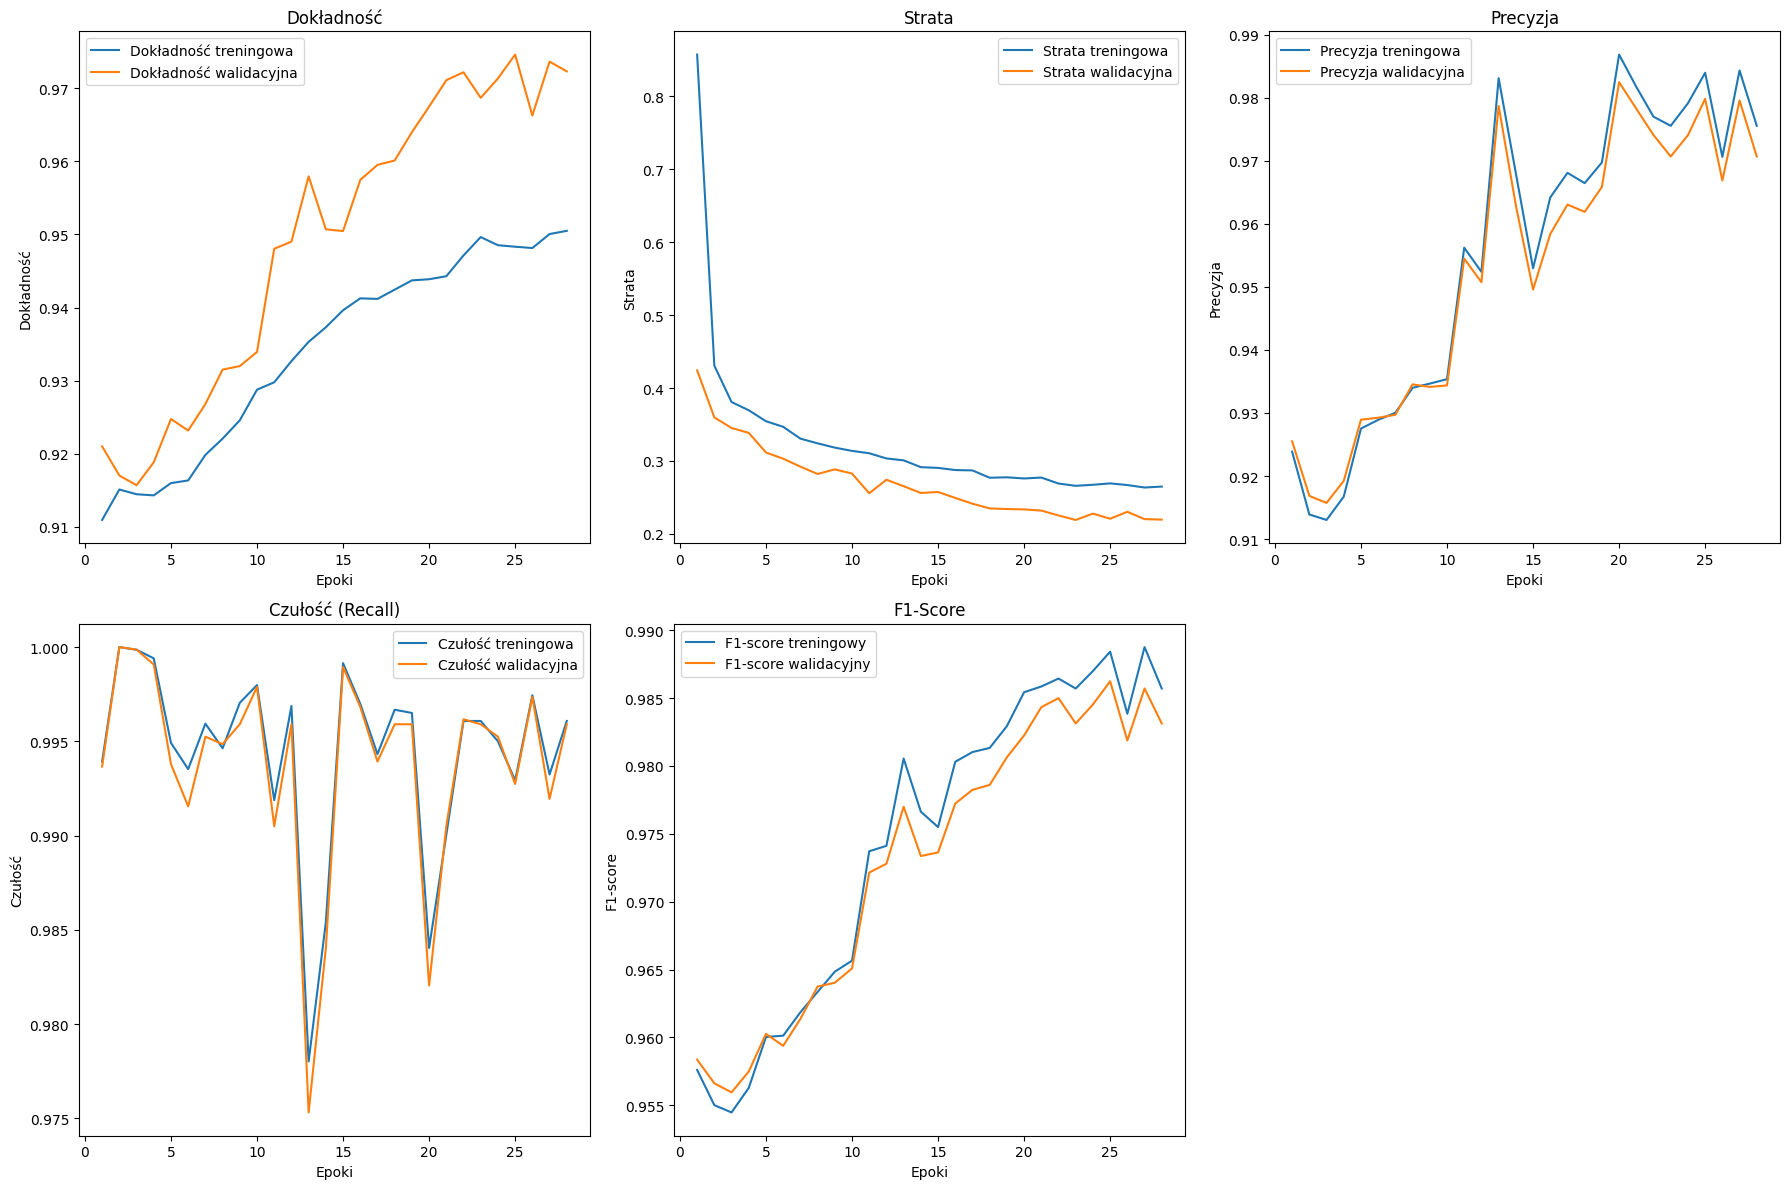

ValueError: Found input variables with inconsistent numbers of samples: [8277, 42690]

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, Callback
from keras import regularizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import random
import pickle

# Parametry modelu
dropout = 0.7
filters = 32
kernel_size = 3
pool_size = 1
dense_units = 50
optimizer = "adam"
epochs = 100
batchsize = 128
patience = 5
max_length = 200  # Maksymalna długość sekwencji
vector_dim = word_vectors.vector_size  # Rozmiar wektora w modelu Word2Vec

# Tworzenie zestawu treningowego
print("Tworzenie zestawu danych...")

TrainX = []  # Lista do przechowywania danych treningowych (X)
TrainY = []  # Lista do przechowywania etykiet treningowych (Y)
keys = list(range(len(allblocks)))
for k in keys:
    block = allblocks[k]
    code = block[0]
    token = getTokens(code)  # Pobranie wszystkich tokenów z fragmentu kodu

    vectorlist = []
    for t in token:  # Konwersja tokenów na reprezentację wektorową Word2Vec
        if t in word_vectors.key_to_index and t != " ":
            vector = word_vectors[t]
            vectorlist.append(vector.tolist())

    # Padding lub skracanie sekwencji do stałej długości
    if len(vectorlist) < max_length:
        vectorlist.extend([[0] * vector_dim] * (max_length - len(vectorlist)))
    else:
        vectorlist = vectorlist[:max_length]

    TrainX.append(vectorlist)  # Dodanie listy wektorów do X
    TrainY.append(block[1])  # Dodanie etykiety do Y

# Konwersja na numpy array
TrainX = np.array(TrainX, dtype=np.float32)
TrainY = np.array(TrainY, dtype=np.float32)

print(f'Kształt TrainX: {TrainX.shape}')
print(f'Kształt TrainY: {TrainY.shape}')

# Wylosowanie kolejności próbek i podział na zestawy
keys = list(range(len(TrainX)))
random.shuffle(keys)

cutoff = round(0.7 * len(keys))  # 70% na zestaw treningowy
cutoff2 = round(0.85 * len(keys)) # 15% na zestaw walidacyjny i 15% na zestaw testowy

keystrain = keys[:cutoff]         # Zestaw treningowy (70%)
keystest = keys[cutoff:cutoff2]   # Zestaw walidacyjny (15%)
keysfinaltest = keys[cutoff2:]    # Zestaw testowy (15%)

# Przydzielanie danych do odpowiednich zestawów
X_train = TrainX[keystrain]
y_train = TrainY[keystrain]

X_val = TrainX[keystest]
y_val = TrainY[keystest]

X_test = TrainX[keysfinaltest]
y_test = TrainY[keysfinaltest]

# Sprawdzenie liczby próbek w każdym zbiorze
print(f"Próbki w zbiorze treningowym: {len(X_train)}")
print(f"Próbki w zbiorze walidacyjnym: {len(X_val)}")
print(f"Próbki w zbiorze testowym: {len(X_test)}")

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

# Callback do monitorowania precyzji, recall i F1
class MetricsLogger(Callback):
    def on_epoch_end(self, epoch, logs={}):
        y_pred_train = (self.model.predict(X_train) > 0.5).astype("int32")
        y_pred_val = (self.model.predict(X_val) > 0.5).astype("int32")
        
        logs['precision_train'] = precision_score(y_train, y_pred_train)
        logs['recall_train'] = recall_score(y_train, y_pred_train)
        logs['f1_train'] = f1_score(y_train, y_pred_train)
        
        logs['precision_val'] = precision_score(y_val, y_pred_val)
        logs['recall_val'] = recall_score(y_val, y_pred_val)
        logs['f1_val'] = f1_score(y_val, y_pred_val)
        
        print(f'Epoch {epoch + 1} - Precyzja treningowa: {logs["precision_train"]}, Recall: {logs["recall_train"]}, F1: {logs["f1_train"]}')
        print(f'Epoch {epoch + 1} - Precyzja walidacyjna: {logs["precision_val"]}, Recall: {logs["recall_val"]}, F1: {logs["f1_val"]}')

metrics_logger = MetricsLogger()

# Tworzenie modelu
model = Sequential()
model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(max_length, vector_dim)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(dense_units, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Trenowanie modelu i zapisywanie historii
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batchsize, validation_data=(X_val, y_val), 
                    callbacks=[early_stopping, metrics_logger])

# Rysowanie wykresów z polskimi etykietami
def plot_training_metrics(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(18, 12))

    # Wykres dokładności
    plt.subplot(2, 3, 1)
    plt.plot(epochs, history.history['accuracy'], label='Dokładność treningowa')
    plt.plot(epochs, history.history['val_accuracy'], label='Dokładność walidacyjna')
    plt.title('Dokładność')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.legend()

    # Wykres straty (błędu)
    plt.subplot(2, 3, 2)
    plt.plot(epochs, history.history['loss'], label='Strata treningowa')
    plt.plot(epochs, history.history['val_loss'], label='Strata walidacyjna')
    plt.title('Strata')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.legend()

    # Wykres precyzji
    plt.subplot(2, 3, 3)
    plt.plot(epochs, history.history['precision_train'], label='Precyzja treningowa')
    plt.plot(epochs, history.history['precision_val'], label='Precyzja walidacyjna')
    plt.title('Precyzja')
    plt.xlabel('Epoki')
    plt.ylabel('Precyzja')
    plt.legend()

    # Wykres czułości (Recall)
    plt.subplot(2, 3, 4)
    plt.plot(epochs, history.history['recall_train'], label='Czułość treningowa')
    plt.plot(epochs, history.history['recall_val'], label='Czułość walidacyjna')
    plt.title('Czułość (Recall)')
    plt.xlabel('Epoki')
    plt.ylabel('Czułość')
    plt.legend()

    # Wykres F1-score
    plt.subplot(2, 3, 5)
    plt.plot(epochs, history.history['f1_train'], label='F1-score treningowy')
    plt.plot(epochs, history.history['f1_val'], label='F1-score walidacyjny')
    plt.title('F1-Score')
    plt.xlabel('Epoki')
    plt.ylabel('F1-score')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Wywołanie funkcji do rysowania wykresów
plot_training_metrics(history)
# Tworzenie macierzy pomyłek (Confusion Matrix)
cm = confusion_matrix(y_test, yhat_test)

# Wizualizacja macierzy pomyłek z polskimi etykietami
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatywne", "Pozytywne"], yticklabels=["Negatywne", "Pozytywne"])
plt.title("Macierz pomyłek (Confusion Matrix)")
plt.xlabel("Przewidywana etykieta")
plt.ylabel("Prawdziwa etykieta")
plt.show()

# Ewaluacja modelu na zbiorze treningowym
print("\nEwaluacja na zbiorze treningowym:")
yhat_train = (model.predict(X_train) > 0.5).astype("int32")
accuracy_train = accuracy_score(y_train, yhat_train)
precision_train = precision_score(y_train, yhat_train)
recall_train = recall_score(y_train, yhat_train)
f1_train = f1_score(y_train, yhat_train)

print(f"Dokładność: {accuracy_train}")
print(f"Precyzja: {precision_train}")
print(f"Czułość: {recall_train}")
print(f"F1 score: {f1_train}")

# Przewidywania na zbiorze testowym
print("\nPrzewidywania na zbiorze testowym:")
yhat_test = (model.predict(X_test) > 0.5).astype("int32")
accuracy_test = accuracy_score(y_test, yhat_test)
precision_test = precision_score(y_test, yhat_test)
recall_test = recall_score(y_test, yhat_test)
f1_test = f1_score(y_test, yhat_test)

print(f"Dokładność: {accuracy_test}")
print(f"Precyzja: {precision_test}")
print(f"Czułość: {recall_test}")
print(f"F1 score: {f1_test}")

In [70]:
# Tworzenie macierzy pomyłek (Confusion Matrix)
print(len(y_test))
print(len(yhat_test))
cm = confusion_matrix(y_test, yhat_test)

# Wizualizacja macierzy pomyłek z polskimi etykietami
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatywne", "Pozytywne"], yticklabels=["Negatywne", "Pozytywne"])
plt.title("Macierz pomyłek (Confusion Matrix)")
plt.xlabel("Przewidywana etykieta")
plt.ylabel("Prawdziwa etykieta")
plt.show()

12740
18814


ValueError: Found input variables with inconsistent numbers of samples: [12740, 18814]

In [97]:
# Ewaluacja modelu na zbiorze treningowym
print("\nEwaluacja na zbiorze treningowym:")
yhat_train = (model.predict(X_train) > 0.5).astype("int32")
accuracy_train = accuracy_score(y_train, yhat_train)
precision_train = precision_score(y_train, yhat_train)
recall_train = recall_score(y_train, yhat_train)
f1_train = f1_score(y_train, yhat_train)

print(f"Dokładność: {accuracy_train}")
print(f"Precyzja: {precision_train}")
print(f"Czułość: {recall_train}")
print(f"F1 score: {f1_train}")

# Przewidywania na zbiorze testowym
print("\nPrzewidywania na zbiorze testowym:")
yhat_test = (model.predict(X_test) > 0.5).astype("int32")
accuracy_test = accuracy_score(y_test, yhat_test)
precision_test = precision_score(y_test, yhat_test)
recall_test = recall_score(y_test, yhat_test)
f1_test = f1_score(y_test, yhat_test)

print(f"Dokładność: {accuracy_test}")
print(f"Precyzja: {precision_test}")
print(f"Czułość: {recall_test}")
print(f"F1 score: {f1_test}")



Ewaluacja na zbiorze treningowym:
1208/1208 [==============================] - 2s 2ms/step
Dokładność: 0.9736440129449838
Precyzja: 0.9755297258217007
Czułość: 0.9960817717206133
F1 score: 0.9856986316765475

Przewidywania na zbiorze testowym:
259/259 [==============================] - 0s 2ms/step
Dokładność: 0.969675003020418
Precyzja: 0.97286771387771
Czułość: 0.9944267515923567
F1 score: 0.9835291029595118


8277
8277


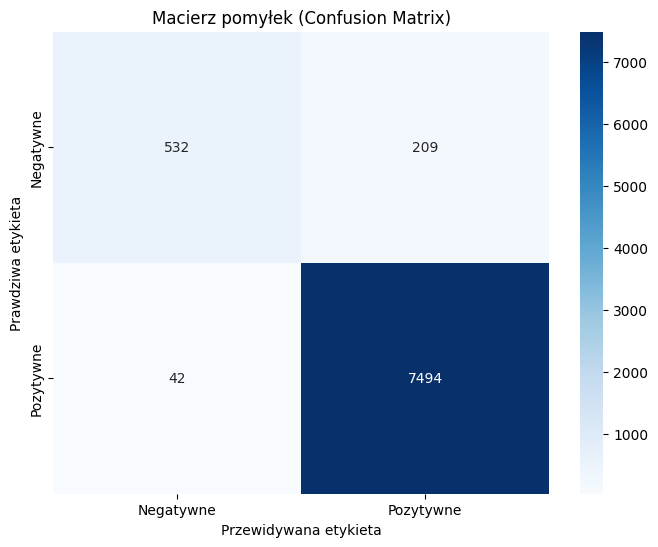

In [98]:
# Tworzenie macierzy pomyłek (Confusion Matrix)
print(len(y_test))
print(len(yhat_test))
cm = confusion_matrix(y_test, yhat_test)

# Wizualizacja macierzy pomyłek z polskimi etykietami
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatywne", "Pozytywne"], yticklabels=["Negatywne", "Pozytywne"])
plt.title("Macierz pomyłek (Confusion Matrix)")
plt.xlabel("Przewidywana etykieta")
plt.ylabel("Prawdziwa etykieta")
plt.show()